# FeedForward Neural Network on `Wisconsin breast cancer diagnostic data set for predictive analysis` By **\Ahmed Ramie 217380**
## The code are staged into 3 Stages
### Stage 1 Data Pre=Processing
### Stage 2 Building the first Feedforward Neural Network model
### Stage 3 getting the test and accuracy predictions
### Stage 4 Building second Feedforward neural network model
### Stage 5 (Final Stage) getting accuracy prediction and concluding my findings
#### Notice* I added comments along with markdown snippets to explain as much as possible while working

In [76]:
# Import necessary libraries
import numpy as np # NumPy is the fundamental package for scientific computing with Python
import pandas as pd # data processing, CSV file
import tensorflow as tf # TensorFlow is an open source machine learning framework for everyone
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import accuracy_score, classification_report # Accuracy classification score, Build a text report showing the main classification metrics
import matplotlib.pyplot as plt # Plotting library for Python and its numerical mathematics extension NumPy
import seaborn as sns # Statistical data visualization
from tensorflow.keras.callbacks import TensorBoard # Enable visualizations for TensorBoard
from sklearn.model_selection import learning_curve # Learning curve
import warnings # To ignore any warnings
warnings.filterwarnings('ignore') # Ignore warnings


## Stage 1, Data Pre-Processing

#### Load the dataset from ```breast_cancer_dataset.csv``` file

In [2]:
bcd = pd.read_csv('breast_cancer_dataset.csv') # bcd = `breast cancer dataset`
bcd.head() # Print the first 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### First, Checking is there's Null values and having a look at the `rows` and `columns`

#### Now we will drop `Unnamed: 32` column and `id` column since we don't need them any further they're irrelavent and not our target

In [3]:
bcd.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) # Drop the `id` and `Unnamed: 32` columns
bcd.head() # Print the first 5 rows of the dataset after dropping the columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Now we will get the diagnosis column and we will retrive 'M'(for Malignant) and 'B' (for Benign). We will make them with 1 and 0, M = 1 which means (ربنا يعفينا و يبعد عنا المرض) Cancerous, and B = 0 Not Cancerous.

In [4]:
bcd.diagnosis.unique() # Print the unique values of the `diagnosis` column

array(['M', 'B'], dtype=object)

In [5]:
bcd['diagnosis'] = bcd['diagnosis'].map({'M':1, 'B':0}) # Map the values of the `diagnosis` column to 1 and 0

In [6]:
bcd.head() # Print the first 5 rows of the dataset after mapping the values of the `diagnosis` column to 1 and 0

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we will call bcd.describe() Function from pandas library where it will give us:

- `count`: Number of non-null observations
- `mean`: Mean of the values
- `std`: Standard deviation of the observations
- `min`: Minimum of the values in the object
- `25%`: First quartile (25th percentile)
- `50%`: Second quartile (Median)
- `75%`: Third quartile (75th percentile)
- `max`: Maximum of the values in the object

In [7]:
bcd.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Now we will make some visualizations to better understand the data using plt and sns

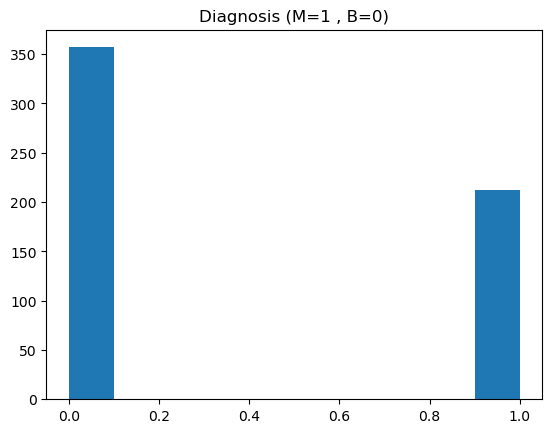

In [8]:
bcd.describe()
plt.hist(bcd['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show() # Show the plot for the `diagnosis` column

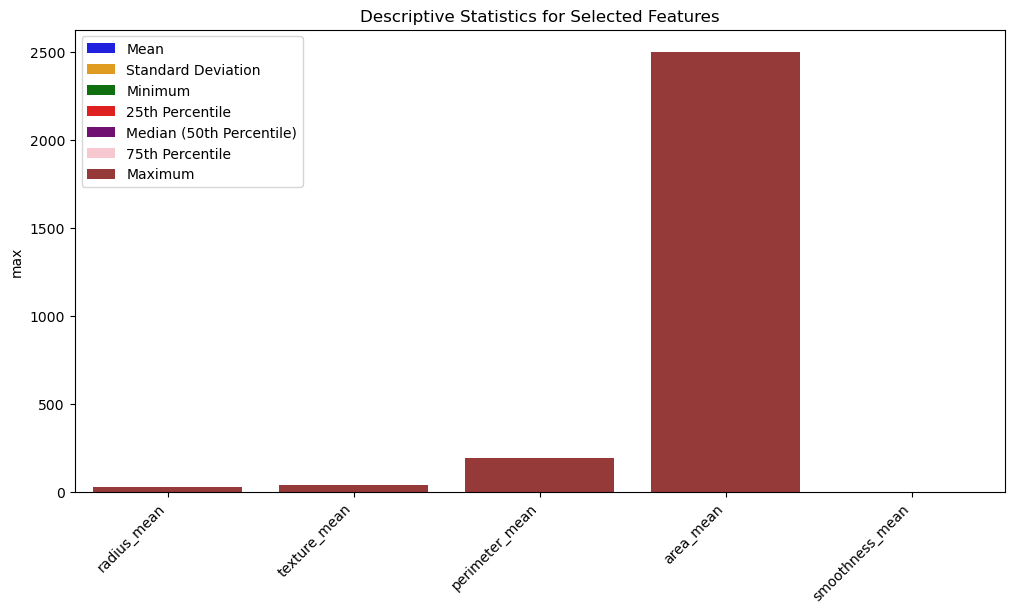

In [9]:
# Select features for visualization
features_for_visualization = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Extract relevant statistics from the describe function output
describe_stats = bcd[features_for_visualization].describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Transpose the DataFrame for better visualization
describe_stats = describe_stats.transpose()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=describe_stats.index, y='mean', data=describe_stats, color='blue', label='Mean')
sns.barplot(x=describe_stats.index, y='std', data=describe_stats, color='orange', label='Standard Deviation')
sns.barplot(x=describe_stats.index, y='min', data=describe_stats, color='green', label='Minimum')
sns.barplot(x=describe_stats.index, y='25%', data=describe_stats, color='red', label='25th Percentile')
sns.barplot(x=describe_stats.index, y='50%', data=describe_stats, color='purple', label='Median (50th Percentile)')
sns.barplot(x=describe_stats.index, y='75%', data=describe_stats, color='pink', label='75th Percentile')
sns.barplot(x=describe_stats.index, y='max', data=describe_stats, color='brown', label='Maximum')

plt.title('Descriptive Statistics for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

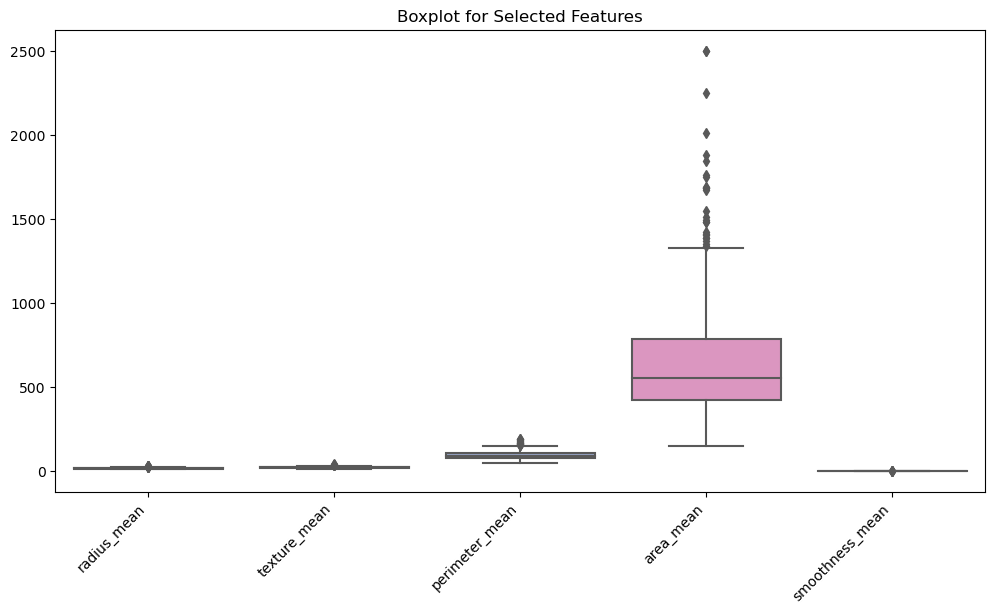

In [10]:
# Select features for box plot
features_for_boxplot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=bcd[features_for_boxplot], palette='Set2')
plt.title('Boxplot for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.show()

Now we will explore why area mean has the higher variability, could this mean it has outliers?
we will try to detect outliers and see what we can find

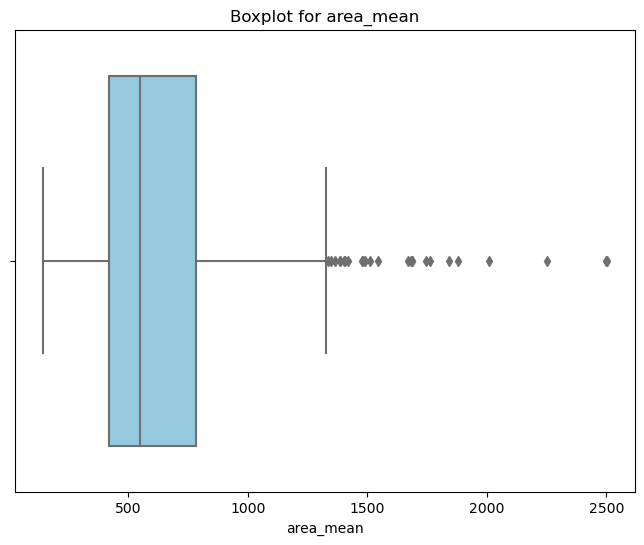

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='area_mean', data=bcd, color='skyblue')
plt.title('Boxplot for area_mean')
plt.show()

<Figure size 1000x800 with 0 Axes>

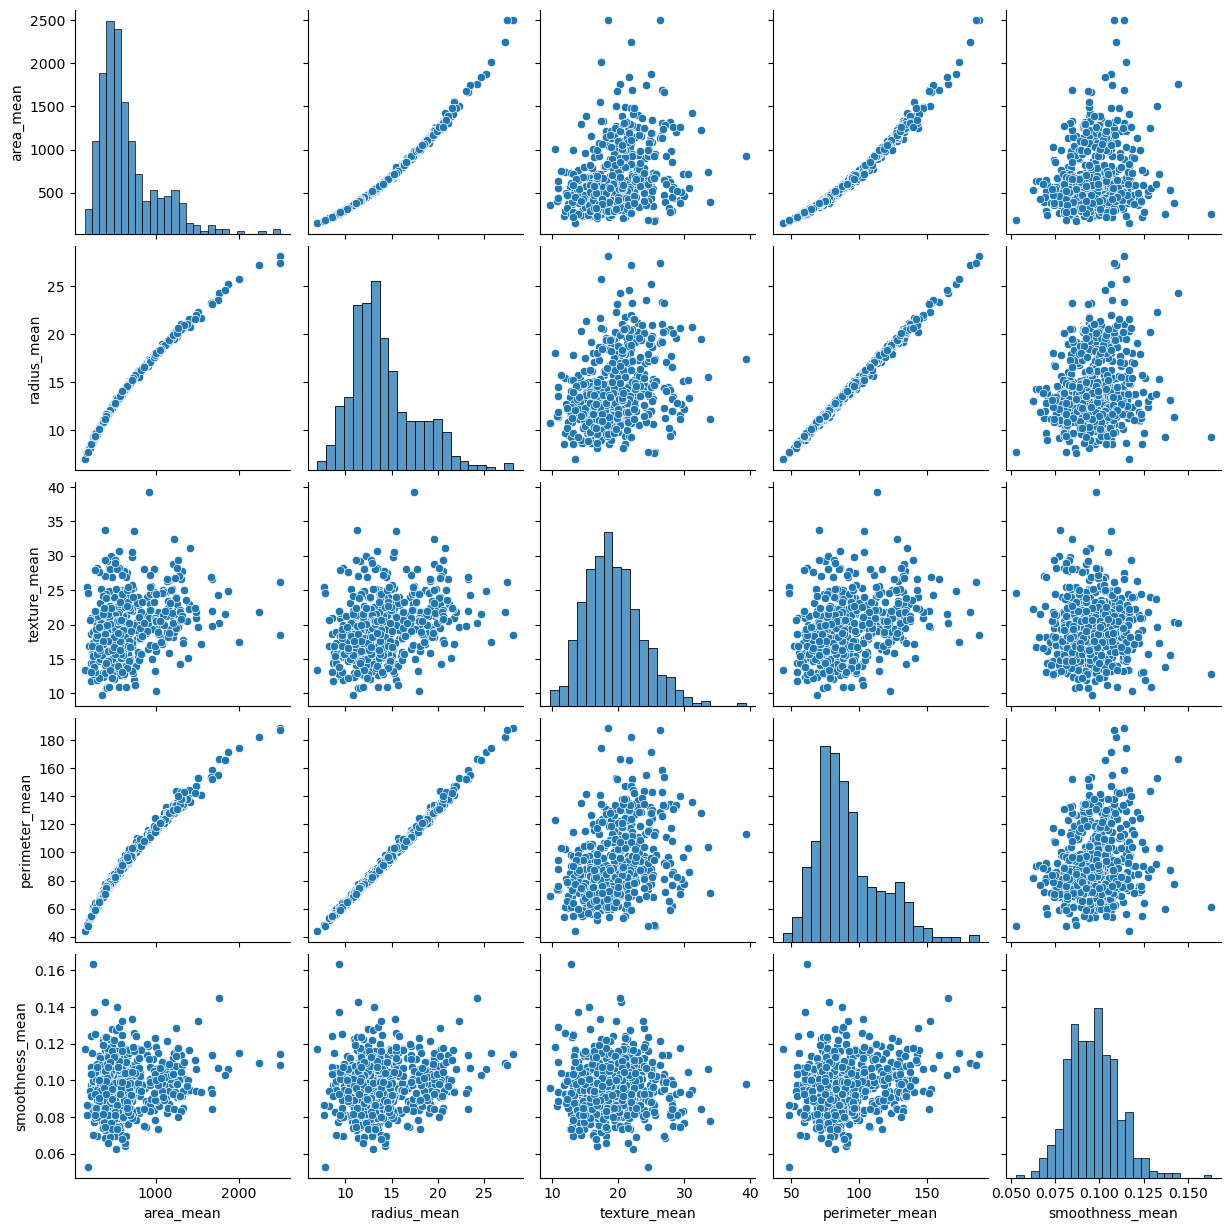

In [12]:
plt.figure(figsize=(10, 8))
sns.pairplot(bcd[['area_mean', 'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean']])
plt.show()

Now as we can see, there are some Outliers, so we will try  detecting them
but first let's scale them first

In [13]:
# Select features for scaling
features_for_scaling = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected features
bcd_scaled = bcd.copy()  # Create a copy of the DataFrame to store scaled values
bcd_scaled[features_for_scaling] = scaler.fit_transform(bcd[features_for_scaling])
bcd_scaled.head() # Print the first 5 rows of the dataset after scaling the selected features

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Now we will try to detect outliers

In [14]:
Q1 = bcd['area_mean'].quantile(0.25) # Q1 = 1st quartile (25th percentile) of the `area_mean` column values
Q3 = bcd['area_mean'].quantile(0.75) # Q3 = 3rd quartile (75th percentile) of the `area_mean` column values
IQR = Q3 - Q1 # IQR = Interquartile range (IQR) of the `area_mean` column values (Q3 - Q1)

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR # lower_bound = Q1 - 1.5 * IQR means that any value less than this number is an outlier
upper_bound = Q3 + 1.5 * IQR # upper_bound = Q3 + 1.5 * IQR means that any value greater than this number is an outlier

# Identify outliers
outliers = bcd[(bcd['area_mean'] < lower_bound) | (bcd['area_mean'] > upper_bound)]

# Print the outliers
print("Outliers in 'area_mean':")
print(outliers)


Outliers in 'area_mean':
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
23           1        21.16         23.04           137.2     1404.0   
82           1        25.22         24.91           171.5     1878.0   
108          1        22.27         19.67           152.8     1509.0   
122          1        24.25         20.20           166.2     1761.0   
164          1        23.27         22.04           152.1     1686.0   
180          1        27.22         21.87           182.1     2250.0   
202          1        23.29         26.67           158.9     1685.0   
212          1        28.11         18.47           188.5     2499.0   
236          1        23.21         26.97           153.5     1670.0   
250          1        20.94         23.56           138.9     1364.0   
265          1        20.73         31.12           135.7     1419.0   
272          1        21.75         20.99           147.3     1491.0   
339          1        23.51         24.

#### Now that we detected them, there's no need to drop them. Since the dataset is medical and they still provide meaningful information about the dataset.

## Stage 2, Building FeedForward Neural Network

Now we will create a test set and a training set for our Model.

In [15]:
# Split the scaled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bcd_scaled, bcd["diagnosis"], test_size=0.3, random_state=99) # 70% training and 30% test

In [16]:
model = tf.keras.Sequential([ # Create a Sequential model aka linear stack of layers aka feed-forward neural network
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Add a Dense layer with 128 neurons, ReLU activation function, and input shape of X_train
    tf.keras.layers.Dropout(0.5), # Add a Dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dense(64, activation='relu'), # Add a Dense layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dropout(0.5), # Add a Dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dense(1, activation='sigmoid') # Add a Dense layer with 1 neuron and sigmoid activation function
])
  

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
# the loss function is binary_crossentropy since we are dealing with binary classification and the activation function of the output layer is sigmoid
# the optimizer is adam since it is the most commonly used optimizer
# adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks


In [18]:
# Now we train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000


13/13 [==============================] - 1s 2ms/step - loss: 56.3559 - accuracy: 0.4472
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 38.5082 - accuracy: 0.4724
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 35.1105 - accuracy: 0.4623
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 26.9127 - accuracy: 0.4623
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 22.4574 - accuracy: 0.4950
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 19.1791 - accuracy: 0.4724
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 14.5305 - accuracy: 0.5000
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 11.7401 - accuracy: 0.5503
Epoch 9/1000
13/13 [==============================] - 0s 966us/step - loss: 9.5307 - accuracy: 0.5829
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.0638 - accu

In [19]:
# Create a TensorBoard callback for the learning curve plot
tensorboard_callback = TensorBoard(log_dir="./logs")

I believe using 1000 Epochs, made the model get a lesser loss, better accuracy.
Maybe if we do 1 million, it could be near to 1 and the loss near to 0

# Stage 3 Get the Model accuracy and visualize it.

In [20]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.0001).astype(int)  # Convert probabilities to binary predictions by 0.0001 as threshold
# The predict_classes method has been deprecated in recent versions of TensorFlow that is why we use the above method.
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred) # Build a text report showing the main classification metrics which are precision, recall, and f1-score

# Display results
print(f'Model Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report_str)



6/6 [==============================] - 0s 1ms/step
Model Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.97      1.00      0.98        58

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



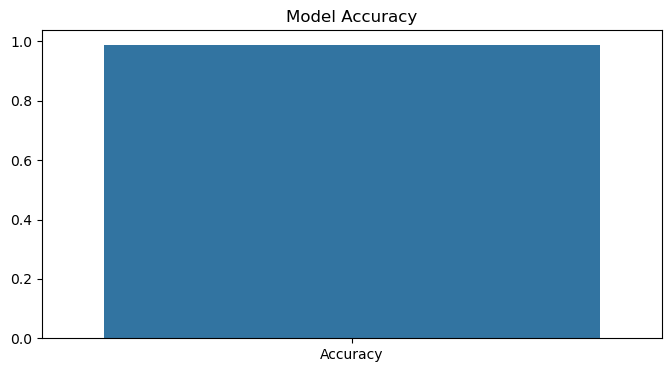

In [21]:
# Plot the accuracy
plt.figure(figsize=(8, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.show()

In [22]:
# Convert probabilities to binary predictions by varying the threshold
thresholds = np.arange(0.1, 1.0, 0.1) # Create a list of thresholds
metrics_by_threshold = [] # Create an empty list to store metrics for each threshold

for threshold in thresholds: # Loop over thresholds
    y_pred = (y_pred_prob > threshold).astype(int) # Convert probabilities to binary predictions by the threshold
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy score
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True) # Calculate precision, recall, and f1-score
    metrics_by_threshold.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision (Class 0)': classification_report_dict['0']['precision'],
        'Recall (Class 0)': classification_report_dict['0']['recall'],
        'F1-score (Class 0)': classification_report_dict['0']['f1-score'],
        'Precision (Class 1)': classification_report_dict['1']['precision'],
        'Recall (Class 1)': classification_report_dict['1']['recall'],
        'F1-score (Class 1)': classification_report_dict['1']['f1-score'],
    })


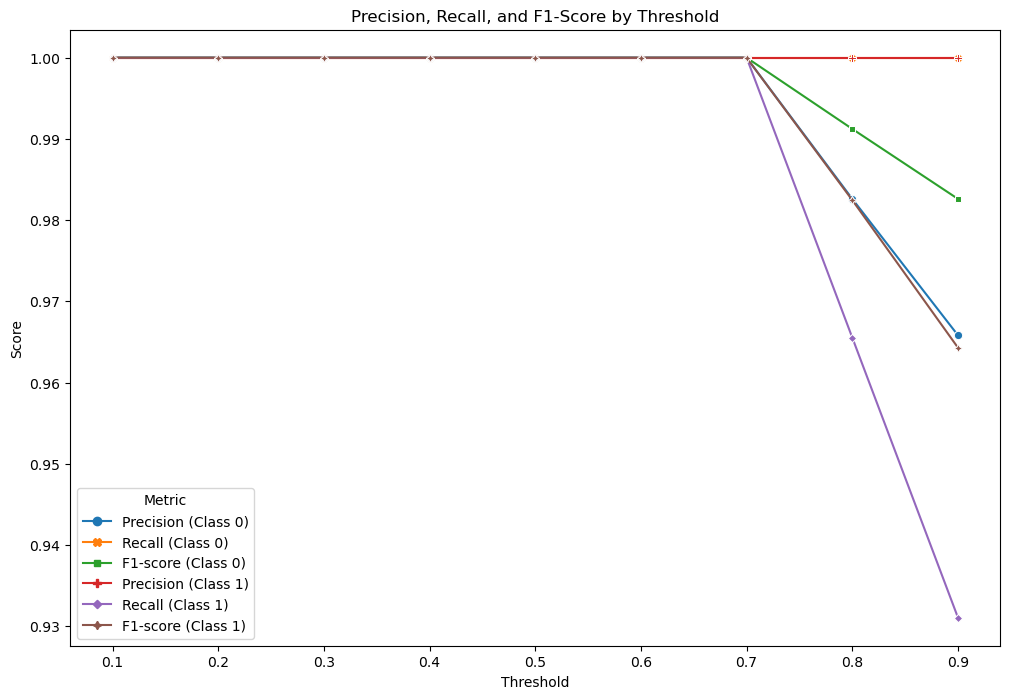

In [23]:
# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics_by_threshold) # this is the dataframe for the metrics

# Melt the DataFrame for easier plotting
metrics_melted = pd.melt(metrics_df, id_vars='Threshold', value_vars=['Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)'], var_name='Metric', value_name='Score') 
# this is the dataframe for the melted metrics

# Plot the metrics
plt.figure(figsize=(12, 8))
sns.lineplot(data=metrics_melted, x='Threshold', y='Score', hue='Metric', style='Metric', markers=True, dashes=False)
plt.title('Precision, Recall, and F1-Score by Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.0054 - val_accuracy: 0.9942
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0081 - val_accuracy: 0.9942
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0083 - val_accuracy: 0.9942
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9950 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9975 - val_loss: 0.0050 - val_accuracy: 0.9942
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9950 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/10
13/13 [==

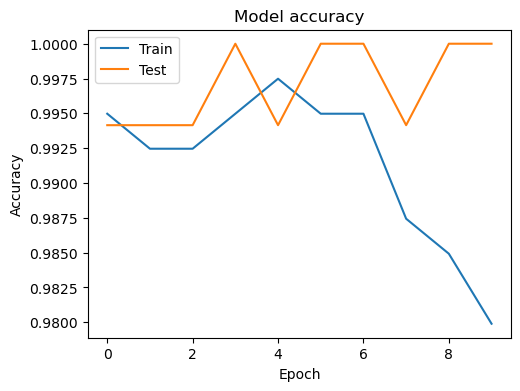

In [40]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



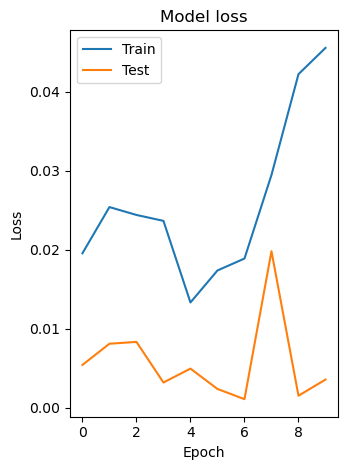

In [41]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Stage 4 Building a varianc of the FFNN model to see if it will get better accuracy

### I'll now attempt to use other functions in building a variance of FFNN model where I'll use `Exponential Linear Unit (ELU)`, `(Scaled Exponential Linear Unit)`, `Tanh (Hyperbolic Tangent)` Although this variance is more complex, let's hope it gets better results.

In [47]:
# Split the scaled data into train and test sets
newX_train, newX_test, newy_train, newy_test = train_test_split(bcd_scaled, bcd["diagnosis"], test_size=0.4, random_state=222)

In [67]:
model_complex = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='elu', input_shape=(newX_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='selu'),
    tf.keras.layers.AlphaDropout(0.5),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='elu')
])

In [68]:
model_complex.compile(optimizer='RMSprop', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
# RMSprop is an optimizer that utilizes the magnitude of recent gradients to normalize the gradients

In [87]:
model_complex.fit(newX_train, newy_train, epochs=999, batch_size=64, callbacks=[tensorboard_callback]) # Train the model for 999 epochs with a batch size of 64

Epoch 1/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6347
Epoch 2/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6347
Epoch 3/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6347
Epoch 4/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6347
Epoch 5/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6347
Epoch 6/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6347
Epoch 7/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6347
Epoch 8/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6347
Epoch 9/999
7/7 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6373
Epoch 10/999
7/7 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6347
Epoch 11/999
7/7 [===========

# Stage 5: Conclusion

Epoch 1/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9922 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9896 - val_loss: 9.6938e-04 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9974 - val_loss: 5.7572e-04 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9974 - val_loss: 5.0238e-04 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9974 - val_loss: 8.7388e-04 - val_accuracy: 1.0000
Epoch 8/100

Text(0.5, 1.0, 'Loss')

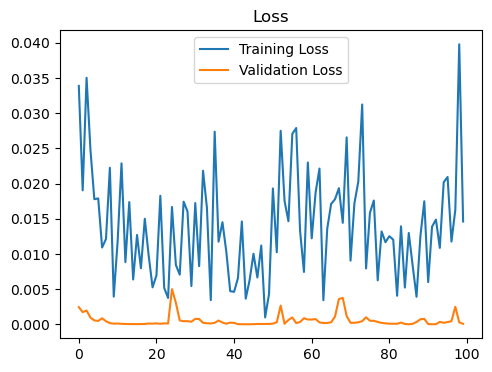

In [85]:
# Fit your model
history = model.fit(newX_train, newy_train, epochs=100, batch_size=64, validation_data=(newX_test, newy_test))

# Plot the learning curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

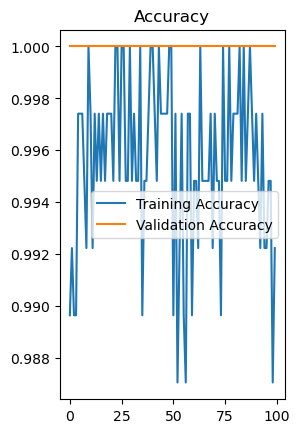

In [86]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

As seen, the first variance got the better results.

This may be due to the complexity of the model, or maybe the batch size
